In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

#defining the path for out desired input
input_file='./input.wav'
fs, data = wavfile.read(input_file)

if len(data.shape) > 1:	
	print("Channels:", data.shape[1])
	data = np.mean(data, axis=1) # Merge channels to make it mono

cutoff = 300 #the cutoff frequency which will be used in the filter
filter_type='highpass' #type of filter either low or high

length = data.shape[0] / fs
print(f"Length: {length:.2f}s")

Length: 14.04s


Text(0.5, 0, 'Time (sec)')

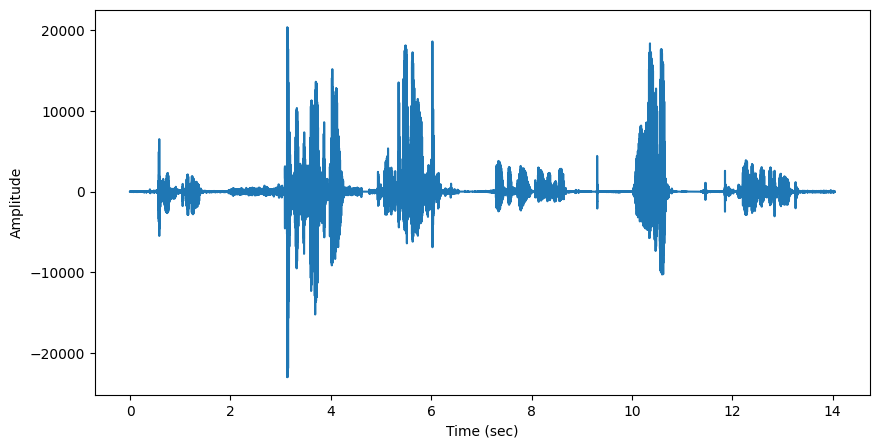

In [2]:
# Plot the audio signal in time domain
time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(10, 5))
plt.plot(time, data)

plt.ylabel("Amplitude")
plt.xlabel("Time (sec)")

Text(0.5, 0, 'Frequency (Hz)')

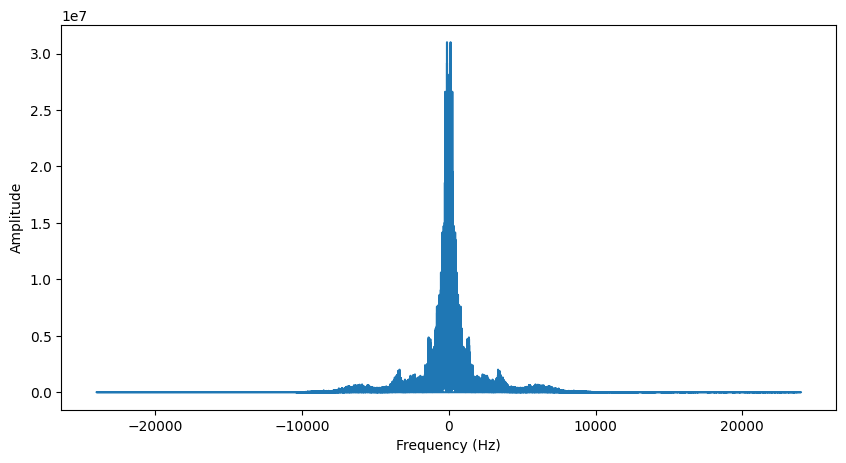

In [3]:
# - Find the frequency domain representation of the signal and plot it
transformed_signal = np.fft.fft(data)

freqs= np.fft.fftfreq(len(transformed_signal), 1/fs) #sample frequency

plt.figure(figsize=(10, 5))
plt.plot(freqs, np.abs(transformed_signal))

plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

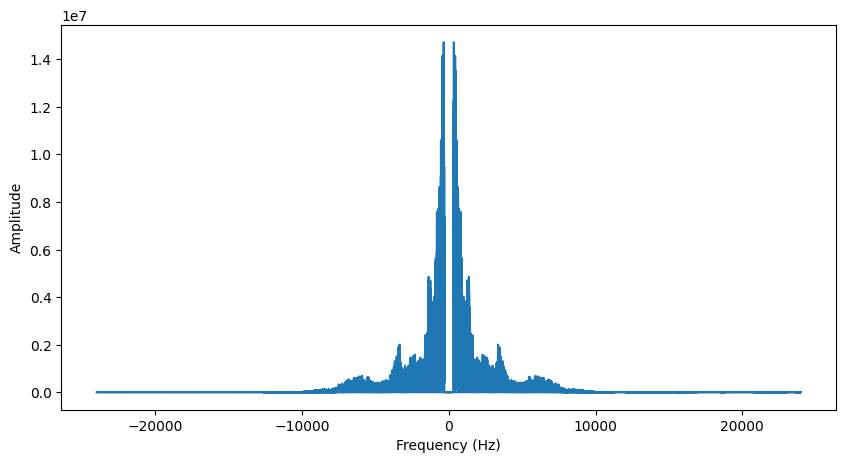

In [4]:
#plotting the filtered spectrum
def filter(signal, filter_type="lowpass"):
    filter_mask = np.ones_like(signal)
    freqs = np.fft.fftfreq(len(signal), 1/fs)

    if filter_type == "lowpass":
        filter_mask[np.abs(freqs) > cutoff] = 0
    elif filter_type == "highpass":
        filter_mask[np.abs(freqs) < cutoff] = 0

    return signal * filter_mask

filtered_spectrum =	filter(transformed_signal, filter_type) 

plt.figure(figsize=(10, 5))
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.plot(freqs, abs(filtered_spectrum))


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


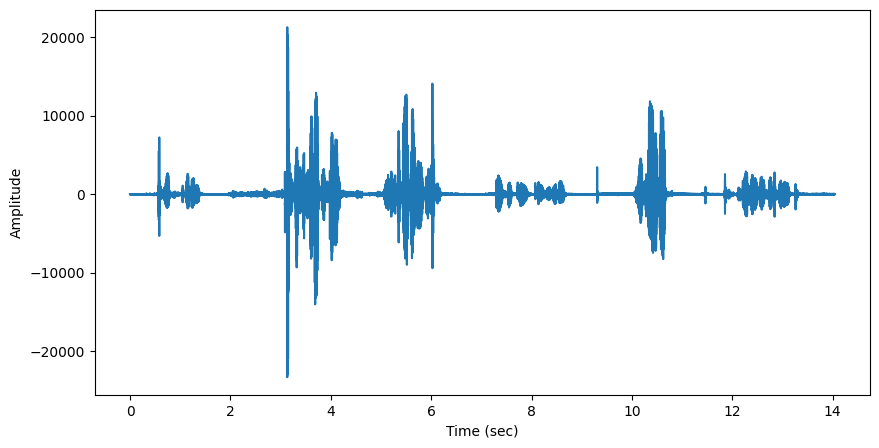

In [5]:
# - Find the corresponding signal in time domain for the filtered signal and plot it
output_signal = np.fft.ifft(filtered_spectrum)
plt.figure(figsize=(10, 5))
plt.ylabel("Amplitude")
plt.xlabel("Time (sec)")
plt.plot(time, output_signal)

In [6]:
# Save the output file
wavfile.write('./output.wav', fs, output_signal.astype(np.int16))

C:\Users\HP\AppData\Local\Temp\ipykernel_4376\1816435379.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write('./output.wav', fs, output_signal.astype(np.int16))
